# Pivot Tables

In this notebook, I'm going to show pivot tables in Pandas.
</br>
Happy Learning 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.DataFrame(
    {"class":list("ABC")*4,
     "lesson":["math","stat"]*6,
     "sex":list("MFMM")*3,
     "sibling":[1,2,3]*4,
     "score":np.arange(40,100,5)})

In [3]:
df

,class,lesson,sex,sibling,score
0,A,math,M,1,40
1,B,stat,F,2,45
2,C,math,M,3,50
3,A,stat,M,1,55
4,B,math,M,2,60
5,C,stat,F,3,65
6,A,math,M,1,70
7,B,stat,M,2,75
8,C,math,M,3,80
9,A,stat,F,1,85


In [4]:
df.groupby("lesson")["score"].mean()

lesson
math    65.0
stat    70.0
Name: score, dtype: float64

In [5]:
df.groupby(
    ["lesson",
     "class"])[
    "score"].aggregate("mean").unstack()

class,A,B,C
lesson,,,
math,55.0,75.0,65.0
stat,70.0,60.0,80.0


In [6]:
df.pivot_table(
    "score",
    index="lesson",
    columns="class")

class,A,B,C
lesson,,,
math,55.0,75.0,65.0
stat,70.0,60.0,80.0


In [7]:
df.pivot_table(
    ["sibling","score"],
    index=["class","lesson"],
    columns="sex")

score       sibling     
sex              F     M       F    M
class lesson                         
A     math     NaN  55.0     NaN  1.0
      stat    85.0  55.0     1.0  1.0
B     math     NaN  75.0     NaN  2.0
      stat    45.0  75.0     2.0  2.0
C     math     NaN  65.0     NaN  3.0
      stat    65.0  95.0     3.0  3.0

In [8]:
df.pivot_table(
    ["sibling","score"],
    index=["class","lesson"],
    columns="sex",margins=True)

score                  sibling          
sex              F          M   All       F    M  All
class lesson                                         
A     math     NaN  55.000000  55.0     NaN  1.0  1.0
      stat    85.0  55.000000  70.0     1.0  1.0  1.0
B     math     NaN  75.000000  75.0     NaN  2.0  2.0
      stat    45.0  75.000000  60.0     2.0  2.0  2.0
C     math     NaN  65.000000  65.0     NaN  3.0  3.0
      stat    65.0  95.000000  80.0     3.0  3.0  3.0
All           65.0  68.333333  67.5     2.0  2.0  2.0

In [9]:
df.pivot_table(
    ["sibling","score"],
    index=["class","lesson"],
    columns="sex",fill_value=0)

score       sibling     
sex              F     M       F    M
class lesson                         
A     math     0.0  55.0     0.0  1.0
      stat    85.0  55.0     1.0  1.0
B     math     0.0  75.0     0.0  2.0
      stat    45.0  75.0     2.0  2.0
C     math     0.0  65.0     0.0  3.0
      stat    65.0  95.0     3.0  3.0

## Multi-level pivot tables

In [10]:
sib=pd.cut(df["sibling"],[0,2,3])

In [12]:
df.pivot_table(values="score",
               index=["lesson", sib],
               columns="class",
               fill_value=0,
               observed=False)

class              A     B     C
lesson sibling                  
math   (0, 2]   55.0  75.0   0.0
       (2, 3]    0.0   0.0  65.0
stat   (0, 2]   70.0  60.0   0.0
       (2, 3]    0.0   0.0  80.0

In [13]:
df.pivot_table(
    "score",
    index="lesson",
    columns="class")

class,A,B,C
lesson,,,
math,55.0,75.0,65.0
stat,70.0,60.0,80.0


In [14]:
df.pivot_table(
    index="lesson",
    columns="class",
    aggfunc="sum")

score           sex         sibling      
class      A    B    C   A   B   C       A  B  C
lesson                                          
math     110  150  130  MM  MM  MM       2  4  6
stat     140  120  160  MF  FM  FM       2  4  6

In [15]:
df.pivot_table(
    index="lesson",
    columns="class",
    aggfunc={"sibling":"max",
             "score":"sum"})

score           sibling      
class      A    B    C       A  B  C
lesson                              
math     110  150  130       1  2  3
stat     140  120  160       1  2  3

## Cross-Tabulations: Crosstab

In [16]:
pd.crosstab(df.sibling,df.lesson)

lesson,math,stat
sibling,,
1,2,2
2,2,2
3,2,2


In [17]:
pd.crosstab([df.sibling, df.lesson], df.sex)

sex             F  M
sibling lesson      
1       math    0  2
        stat    1  1
2       math    0  2
        stat    1  1
3       math    0  2
        stat    1  1

You can download the data set from https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

In [18]:
births=pd.read_csv("DataSets/births.txt")

In [19]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [20]:
births["ten_year"]=10*(births["year"]//10)
births.pivot_table("births",
                   index="ten_year",
                   columns="gender",
                   aggfunc="sum")

gender,F,M
ten_year,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [21]:
%matplotlib inline

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
sns.set() #For style

Text(0, 0.5, 'Annual total births')

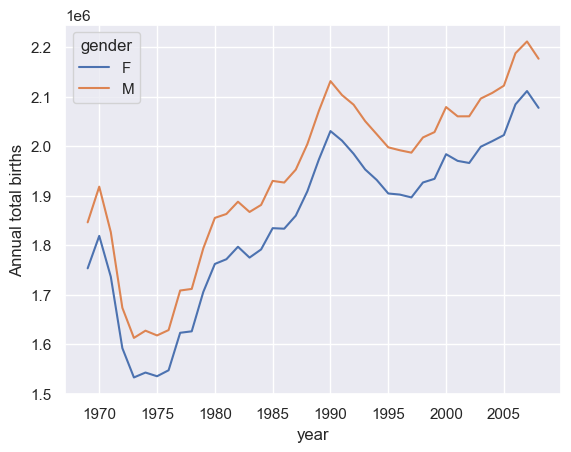

In [24]:
births.pivot_table("births",
                   index="year",
                   columns="gender",
                   aggfunc="sum").plot()
plt.ylabel("Annual total births")